In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
fPAR=nc.Dataset('/results2/SalishSea/nowcast-green.201905/01apr16/SalishSea_1h_20160401_20160401_carp_T.nc')

In [15]:
fPAR.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'PAR', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'sigma_theta', 'e3t', 'Fraser_tracer', 'dissolved_inorganic_carbon', 'total_alkalinity', 'dissolved_oxygen'])

In [11]:
fk=nc.Dataset('/results2/SalishSea/nowcast-green.201905/01apr16/SalishSea_1h_20160401_20160401_grid_W.nc')

In [12]:
fk.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'depthw', 'depthw_bounds', 'vovecrtz', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'vert_eddy_diff', 'vert_eddy_visc', 'dissipation'])

In [10]:
fk.close()

In [41]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    tmask=mesh.variables['tmask'][0,:,:,:]
    z=mesh.variables['gdept_1d'][0,:]
    zw=mesh.variables['gdepw_1d'][0,:]

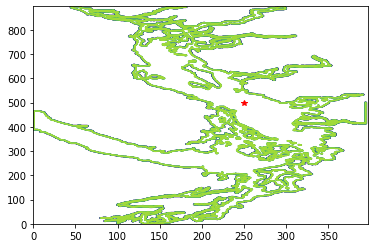

In [32]:
ii=250
jj=500
plt.contour(tmask[0,:,:])
plt.plot(ii,jj,'r*')

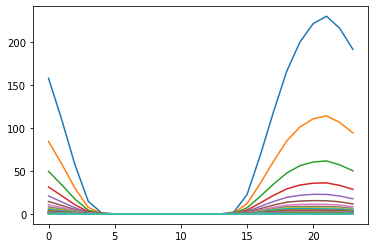

In [31]:
plt.plot(fPAR.variables['PAR'][:,:,jj,ii]); # not land!

In [33]:
dailyPAR=np.mean(fPAR.variables['PAR'][:,:,jj,ii],0)

In [46]:
np.shape(dailyPAR)

(40,)

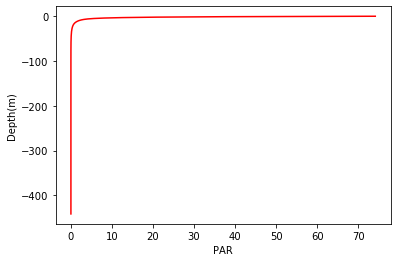

In [44]:
plt.plot(dailyPAR,-1*z,'r-')
plt.xlabel('PAR');
plt.ylabel('Depth(m)');

In [45]:
LL=0.1 # choose 10% light level

In [47]:
xx=dailyPAR>LL*dailyPAR[0]

In [48]:
xx

masked_array(data=[ True,  True,  True,  True,  True, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False],
             mask=False,
       fill_value=True)

In [51]:
# want the w-index between the last true value and the first false value:
# w0 T0 w1 T1 w2 T2
#    T      T    F
# in case above, correct index would be 2: sum of Trues
kk=np.sum(xx)
print(kk)

5


In [52]:
kprof=np.mean(fk.variables['vert_eddy_diff'][:,:,jj,ii],0)

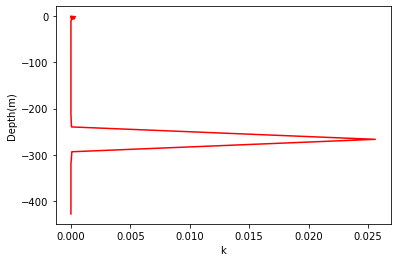

In [54]:
plt.plot(kprof,-1*zw,'r-')
plt.xlabel('k');
plt.ylabel('Depth(m)');

In [55]:
kprof[5]

0.0003141591

In [58]:
def getVEDEuph(ii,jj,LL,fileK,filePAR):
    dailyPAR=np.mean(fPAR.variables['PAR'][:,:,jj,ii],0)
    kk=np.sum(dailyPAR>LL*dailyPAR[0])
    kprof=np.mean(fk.variables['vert_eddy_diff'][:,:,jj,ii],0)
    return kprof[kk]

In [59]:
getVEDEuph(ii,jj,LL,fk,fPAR)

0.0003141591